<a href="https://colab.research.google.com/github/lpaolariosm/Ecuaciones-Diferenciales-Parciales-I/blob/main/Ecuacion%20del%20calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [1]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [12]:
def recta(x):
    y = zeros(len(x)) #Crea un arreglo de ceros con la misma longitud que x
    for i in range(len(x)): #Itera sobre cada elemento de x
        y[i] = x[i] #Asigna los valores de y=x
    return y #Devuelve el arreglo de y

Define la función identidad $f(x)$, haciendo un arreglo de x para devolver otro arreglo y.

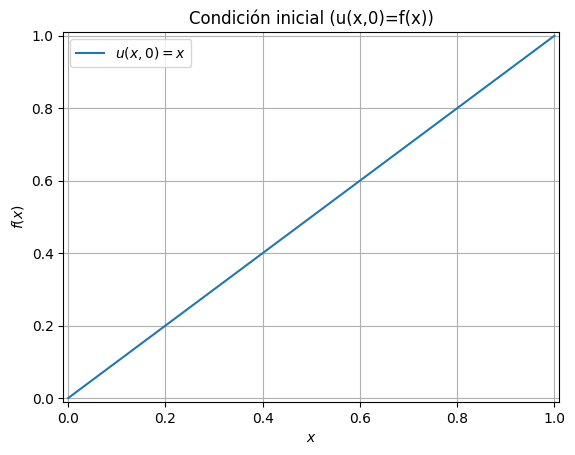

In [14]:
x = linspace(0,1,1000) #Genera 1000 puntos equidistantes entre 0 y 1
f = recta(x) #Aplica la función "rescta(x)" a los valores de x
plot(x,f,label='$u(x,0)=x$') #Grafica f(x)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');  #Etiquena eje x y eje y
plt.title("Condición inicial (u(x,0)=f(x))") #Tiyulo de la gráfica
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend() #Define los limites en el eje x, en el eje y, y muestra la cuadricula en la gráfica y el último muestra la leyenda con la etiqueta de la función
show() #Muestra la gráfica.

Genera una gráfica de la función $f(x)=x$ en el intervalo [0,1] representando la condición inicial.

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [31]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x)) #Crea un arreglo de ceros con la misma longitud que x
    for n in range(1,N): #Itera desde n=1 hasta N-1
        f += (-1)**(n+1)*sin(n*pi*x)/(n) #Suma cada termino de la serie de Fourier
    return (2.0/pi)*f #Multiplica por el factor 2/pi

Calcula la serie de Fourier truncada para aproximar la función $f(x)=x$ en el intervalos [0,1]. N controla el numero de términos en la serie. Se usa la suma de senos ponderados para reconstruir la función. El resultado es escalado por $2/π$ para normalizar la serie.

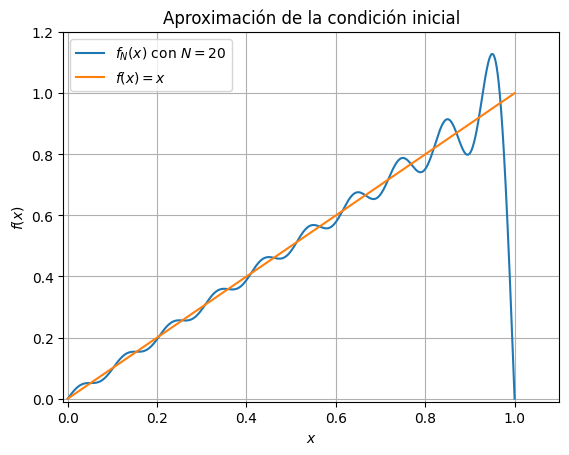

In [33]:
f_n = u_0(x) #Calcula la serie truncada con N=20
plot(x,f_n,label='$f_N(x)$ con $N=20$') #Grafica la aproximación con la serie de Fourier
plot(x,f,label='$f(x)=x$') #Grafica la función original f(x)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');  #Etiquetas de eje x & eje y
plt.title("Aproximación de la condición inicial") #Titulo de la gráfica
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend() #Define los limites del eje x & el eje y, Activa la cuadricula y muestra la leyenda definidas en label
show() #muestra la gráfica.

Las primeras dos lineas generan la grafica de la serie de Fourier y la gráfica de la función original respectivamente, en las siguientes lineas se generan y configuran titulos, limites y leyendas de cada eje para diferenciar las graficas, y la última linea muestra la gráfica generada.  En esta parte podemos ver como cambia la grafica de Fourier al cambiar el valor de N, entre más grande es el número de armonicos es más exacta la aproximación y se asemeja a la función original.   Podemos observar el fenomeno de Gibbs, el cual causa oscilaciones cerca de los extremos.

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

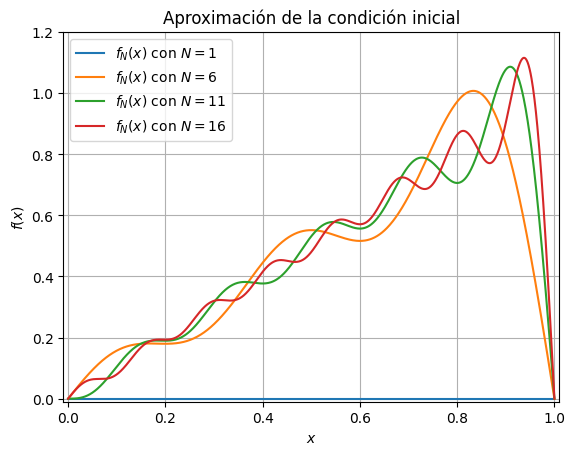

In [34]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [7]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [8]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

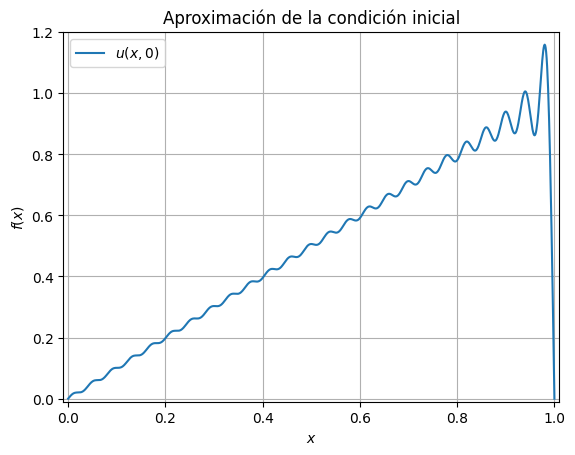

In [9]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

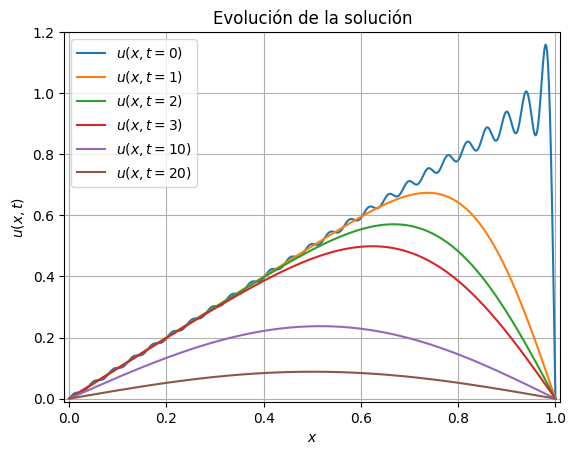

In [10]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

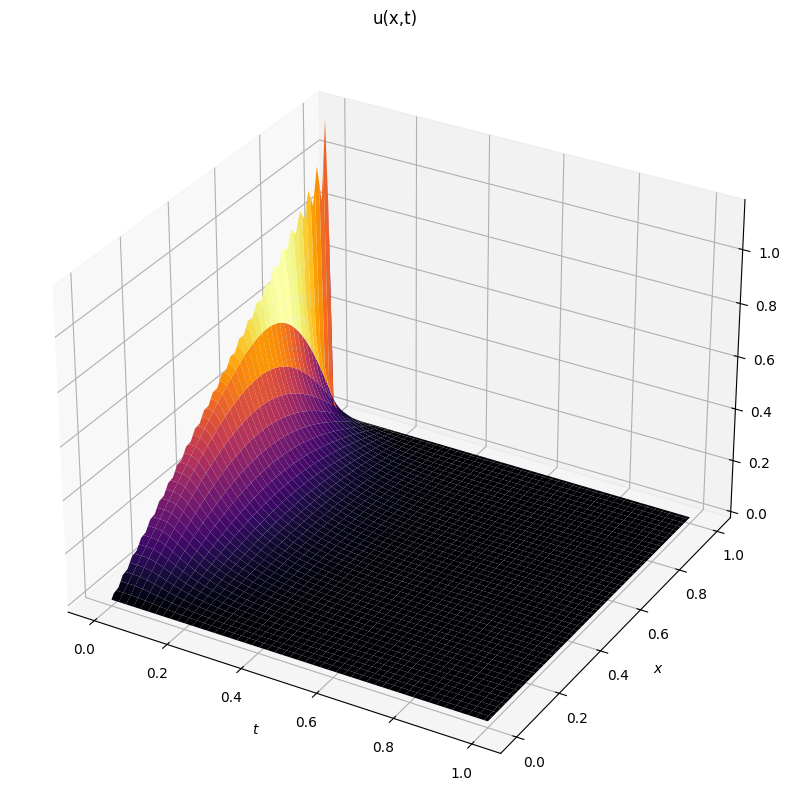

In [11]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x)) #Crea un arreglo de ceros con la misma longitud que x
    for n in range(1,N): #Itera desde n=1 hasta N-1
        f += (-1)**(n+1)*sin(n*pi*x)/(n) #Suma cada termino de la serie de Fourier
    return (2.0/pi)*f #Multiplica por el factor 2/pi